based on https://www.kaggle.com/code/nitin194/twitter-sentiment-analysis-word2vec-doc2vec/notebook

In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
# read train and test datasets.

train  = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv')

In [3]:
train[train['target'] == 0].head(3)

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0


In [4]:
train[train['target'] == 1].head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


In [5]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [6]:
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

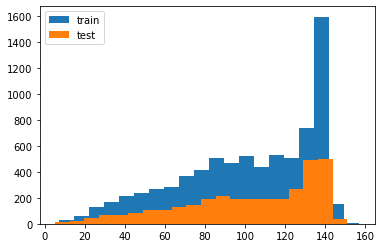

In [7]:
plt.hist(train.text.str.len(), bins=20, label='train')
plt.hist(test.text.str.len(), bins=20, label='test')
plt.legend()
plt.show()

In [8]:
combi = train.append(test, ignore_index=True, sort=True)
combi.shape

/var/folders/j2/9qm10p1x7f9d_z9btb9d1clr0000gn/T/ipykernel_49462/2276653185.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combi = train.append(test, ignore_index=True, sort=True)


(10876, 5)

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [10]:
#Removing Twitter Handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*") 
combi.head(3)

,id,keyword,location,target,text,tidy_tweet
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected


In [11]:
#Removing Punctuations, Numbers, and Special Characters
combi.tidy_tweet = combi.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
combi.head(3)

/var/folders/j2/9qm10p1x7f9d_z9btb9d1clr0000gn/T/ipykernel_49462/1433471234.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi.tidy_tweet = combi.tidy_tweet.str.replace("[^a-zA-Z#]", " ")


,id,keyword,location,target,text,tidy_tweet
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected


### Text Normalization

In [12]:
#Text Normalization
#Here we will use nltk’s PorterStemmer() function to normalize the tweets. 
#But before that we will have to tokenize the tweets. 
#Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

tokenized_tweet = combi.tidy_tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                          [Our, Deeds, are, the, Reason, of, this, #earthquake, May, ALLAH, Forgive, us, all]
1                                                                                                                [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, to, shelter, in, place, are, being, notified, by, officers, No, other, evacuation, or, shelter, in, place, orders, are, expected]
3                                                                                            [people, receive, #wildfires, evacuation, orders, in, California]
4                                                     [Just, got, sent, this, photo, from, Ruby, #Alaska, as, smoke, from, #wildfires, pours, into, a, school]
Name: tidy_tweet, dtype: object

In [13]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                                        [our, deed, are, the, reason, of, thi, #earthquak, may, allah, forgiv, us, all]
1                                                                                           [forest, fire, near, la, rong, sask, canada]
2    [all, resid, ask, to, shelter, in, place, are, be, notifi, by, offic, no, other, evacu, or, shelter, in, place, order, are, expect]
3                                                                                [peopl, receiv, #wildfir, evacu, order, in, california]
4                                   [just, got, sent, thi, photo, from, rubi, #alaska, as, smoke, from, #wildfir, pour, into, a, school]
Name: tidy_tweet, dtype: object

In [14]:
# Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head(10)

,id,keyword,location,target,text,tidy_tweet
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,our deed are the reason of thi #earthquak may allah forgiv us all
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada,forest fire near la rong sask canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,all resid ask to shelter in place are be notifi by offic no other evacu or shelter in place order are expect
3,6,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation orders in California",peopl receiv #wildfir evacu order in california
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,just got sent thi photo from rubi #alaska as smoke from #wildfir pour into a school
5,8,NaN,NaN,1.0,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,#rockyfir updat california hwi close in both direct due to lake counti fire #cafir #wildfir
6,10,NaN,NaN,1.0,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",#flood #disast heavi rain caus flash flood of street in manit colorado spring area
7,13,NaN,NaN,1.0,I'm on top of the hill and I can see a fire in the woods...,i m on top of the hill and i can see a fire in the wood
8,14,NaN,NaN,1.0,There's an emergency evacuation happening now in the building across the street,there s an emerg evacu happen now in the build across the street
9,15,NaN,NaN,1.0,I'm afraid that the tornado is coming to our area...,i m afraid that the tornado is come to our area


### Using WordCloud to see the common words used in the tweets

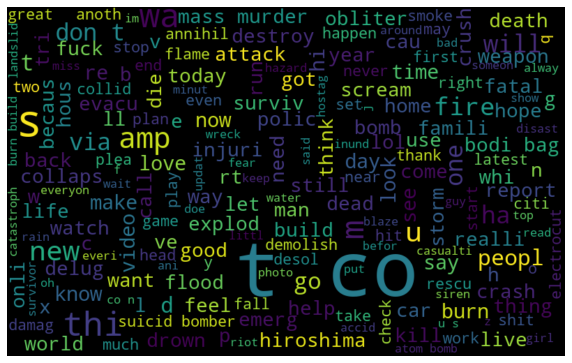

In [15]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

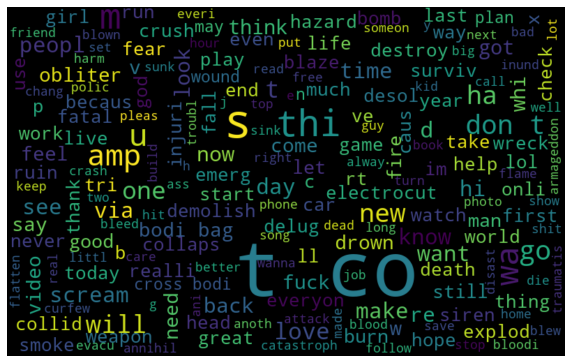

In [16]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['target'] == 0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

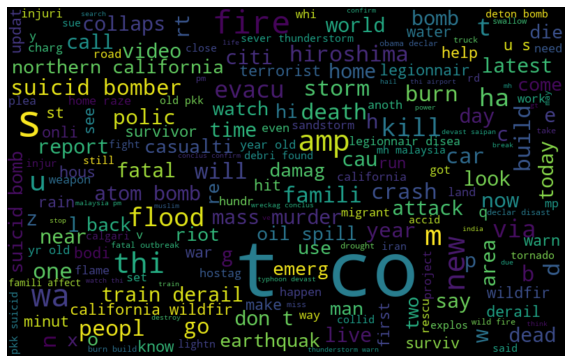

In [17]:
disaster_words = ' '.join([text for text in combi['tidy_tweet'][combi['target'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(disaster_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Seeing the hashtags

In [18]:
# function to collect hashtags 

def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [19]:
# extracting hashtags from non disaster tweets 

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['target'] == 0]) 

# extracting hashtags from disaster tweets

HT_disaster = hashtag_extract(combi['tidy_tweet'][combi['target'] == 1]) 

In [20]:
# unnesting list

HT_regular = sum(HT_regular,[]) 
HT_disaster = sum(HT_disaster,[])

In [21]:
a = nltk.FreqDist(HT_disaster)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
) 

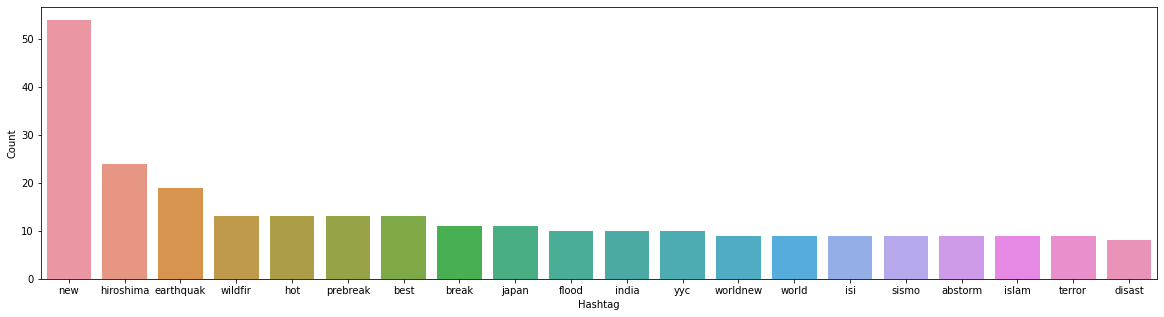

In [22]:
# selecting top 20 most frequent hashtags

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [24]:
%%time

tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size = 200,
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

CPU times: user 45.7 s, sys: 432 ms, total: 46.1 s
Wall time: 7.7 s


(2622572, 3705900)

In [25]:
#testing
model_w2v.wv.most_similar(positive="fire")

[('truck', 0.5649960041046143),
 ('forest', 0.563437819480896),
 ('acr', 0.5582019090652466),
 ('contain', 0.5371364951133728),
 ('grove', 0.524867057800293),
 ('brush', 0.5092950463294983),
 ('complex', 0.5050850510597229),
 ('apart', 0.5042943358421326),
 ('mostli', 0.5019054412841797),
 ('manchest', 0.5012833476066589)]

In [26]:
len(model_w2v.wv['food'])

200

#### Preparing Vectors for Tweets
Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 100. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 100 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [27]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [28]:
#word2vec feature set
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(10876, 200)

#### 2. Doc2Vec Embedding
Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.



In [29]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import TaggedDocument

In [30]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [31]:
labeled_tweets[:6]

[TaggedDocument(words=['our', 'deed', 'are', 'the', 'reason', 'of', 'thi', '#earthquak', 'may', 'allah', 'forgiv', 'us', 'all'], tags=['tweet_0']),
 TaggedDocument(words=['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada'], tags=['tweet_1']),
 TaggedDocument(words=['all', 'resid', 'ask', 'to', 'shelter', 'in', 'place', 'are', 'be', 'notifi', 'by', 'offic', 'no', 'other', 'evacu', 'or', 'shelter', 'in', 'place', 'order', 'are', 'expect'], tags=['tweet_2']),
 TaggedDocument(words=['peopl', 'receiv', '#wildfir', 'evacu', 'order', 'in', 'california'], tags=['tweet_3']),
 TaggedDocument(words=['just', 'got', 'sent', 'thi', 'photo', 'from', 'rubi', '#alaska', 'as', 'smoke', 'from', '#wildfir', 'pour', 'into', 'a', 'school'], tags=['tweet_4']),
 TaggedDocument(words=['#rockyfir', 'updat', 'california', 'hwi', 'close', 'in', 'both', 'direct', 'due', 'to', 'lake', 'counti', 'fire', '#cafir', '#wildfir'], tags=['tweet_5'])]

In [32]:
#train doc2vec model

%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


100%|████████████████████████████████| 10876/10876 [00:00<00:00, 2675498.55it/s]


In [33]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(10876, 200)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [35]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(10876, 1000)

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(10876, 1000)

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

Logistic Regression
Support Vector Machine
RandomForest
XGBoost


#### Evaluation Metric

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
False Positives (FP) – When actual class is no and predicted class is yes.
False Negatives (FN) – When actual class is yes but predicted class in no.
Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall * Precision) / (Recall + Precision)

In [92]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def c_matrix(model, title, filename):
  # model: model object
  # title: string title of confusion matrix
  # filename: string file name, please include .png at end
  
  global y_test
  y_pred = model.predict(X_test)
  
  f, ax = plt.subplots(figsize=(7, 5))
  sns.heatmap(confusion_matrix(y_test, y_pred),
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              xticklabels=('0','1'),
              yticklabels=('0','1'),
              cmap="YlGnBu").set(title=str(title))
  
  plt.savefig(str(filename), dpi=400)

In [74]:
def scoring_table(model, model_name, multi_class, comment):
  # model: model object e.g. of type SVC 
  # model_name: str of model name 
  # multi_class: ovr or ovo 
  # comment: model parameters
  
  # scoring parameters included are 
  # accuracy, auc (multi_class specified by user), recall, precision (both macro - unweighted mean),  
  
  global X_test
  global y_test

  all_scores = pd.read_csv('model_all_scores.csv', index_col=0)

  # get predictions
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)

  # accuracy
  acc = round(model.score(X_test,y_test),4)

  # auc roc 
  auc = round(roc_auc_score(y_test,y_pred_proba, multi_class=multi_class),4)

  # recall
  rec = round(recall_score(y_test,y_pred, average='macro'),4)

  # precision
  prec = round(precision_score(y_test,y_pred, average='macro'),4)

  # f1
  f1 = round(f1_score(y_test,y_pred,  average='macro'),4)

  scores = pd.DataFrame([str(model_name), acc, auc, rec, prec, f1, str(comment)]).T
  scores.columns = all_scores.columns

  all_scores = pd.concat([all_scores,scores], axis=0, ignore_index=True)
  
  all_scores.to_csv('model_all_scores.csv')
  return all_scores

## Logistic Regression

### Bag of Words

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [113]:
# Extracting train and test BoW features 
train_bow = bow[:7613,:] 
test_bow = bow[7613:,:] 

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['target'], random_state=42, test_size=0.3)

X_test = xvalid_bow
y_test = yvalid

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
bow_f1 = f1_score(yvalid, prediction_int) # calculating f1 score for the validation set
bow_score = lreg.score(xvalid_bow,yvalid)
print('bow')
print('score:',bow_score)
print('f1:',bow_f1)

bow
score: 0.7924693520140105
f1: 0.7251141552511418


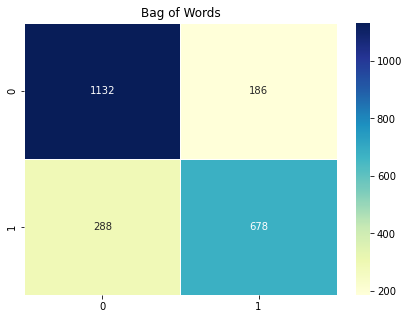

In [114]:
c_matrix(lreg,'Bag of Words','bowlr.png')

In [39]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['target'] = test_pred_int
submission = test[['id','target']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

### TFIDF

In [82]:
train_tfidf = tfidf[:7613,:]
test_tfidf = tfidf[7613:,:] 

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 

prediction = lreg.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 

f1 = f1_score(yvalid, prediction_int) # calculating f1 score for the validation set
score = lreg.score(xvalid_tfidf, yvalid)

print('TFIDF')
print('score:',score)
print('f1:',f1)

TFIDF
score: 0.7955341506129597
f1: 0.7091836734693878


### Word2Vec

In [97]:
# splitting data into training and test set 
xtrain, xtest, ytrain, ytest = train_test_split(train_w2v, train['target'], random_state=42, test_size=0.3)

train_w2v = wordvec_df.iloc[:7613,:]
test_w2v = wordvec_df.iloc[7613:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

X_test = xvalid_w2v
y_test = yvalid

lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1 = f1_score(yvalid, prediction_int) # calculating f1 score for the validation set
score = lreg.score(xvalid_w2v, yvalid)

print('Word2Vec')
print('score:',score)
print('f1:',f1)

Word2Vec
score: 0.7902802101576182
f1: 0.7325842696629213


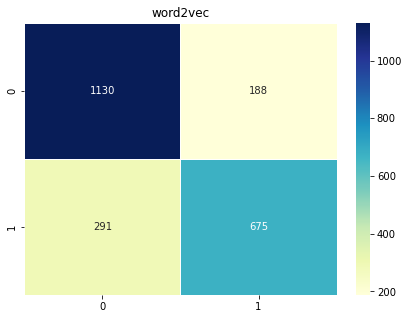

In [105]:
c_matrix(lreg,'word2vec','word2vec.png')

### Doc2Vec

In [89]:
train_d2v = docvec_df.iloc[:7613,:]
test_d2v = docvec_df.iloc[7613:,:] 

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain) 

prediction = lreg.predict_proba(xvalid_d2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)
score = lreg.score(xvalid_d2v, yvalid)

print('Doc2Vec')
print('score:',score)
print('f1:',f1)

Doc2Vec
score: 0.6978984238178634
f1: 0.7325842696629213


### SVM

In [43]:
from sklearn import svm

In [44]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.7089755213055303

In [45]:
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

In [46]:
#tfidf2vec features
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.7246645071726052

In [47]:
#word2vec
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.7313094698686

In [48]:
#doc2vec
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6533705624252093

### Random Forest

In [49]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
f1_score(yvalid, prediction) # validation score

0.7032392894461861

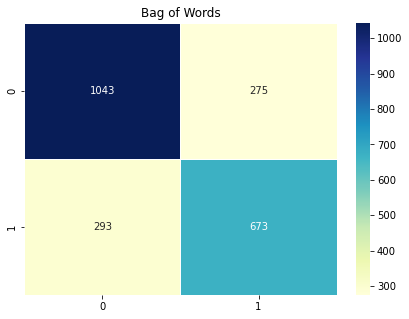

In [116]:
c_matrix(rf,'Bag of Words','bow_rf.png')

In [51]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

In [52]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.7141280353200883

In [106]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.7393526405451448

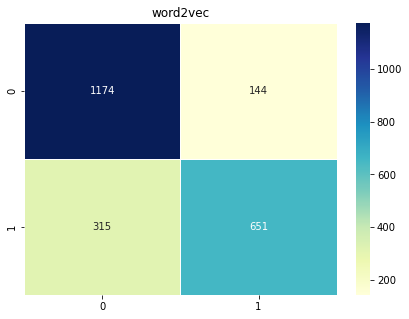

In [107]:
c_matrix(rf,'word2vec','word2vec_rf.png')

In [54]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.5991510006064282

In [55]:
#xgboost
from xgboost import XGBClassifier


In [56]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.7361702127659573

In [57]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

In [58]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.7184986595174262

In [59]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.755024443237371

In [60]:
test_pred = xgb.predict(test_w2v)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_w2v.csv', index=False)

In [61]:
test

,id,keyword,location,text,target,label
0,0,NaN,NaN,Just happened a terrible car crash,1,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",1,1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",1,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1,1
...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn,1,1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power,1,1
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/UtbXLcBIuY,1,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3,1,1


In [62]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.6363143631436314

In [63]:
import xgboost as xgb

In [64]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }